<a href="https://colab.research.google.com/github/misupova/BSSDH-2023/blob/main/2_using_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection using API



## Used API list:
1. [Spaceflight News API](https://spaceflightnewsapi.net/)
2. [Metropolitan Museum of Art's API](https://metmuseum.github.io/)
2. [List of news media APIs](https://en.wikipedia.org/wiki/List_of_news_media_APIs)
3. [A collective list of free APIs](https://github.com/public-apis/public-apis)



## API request format


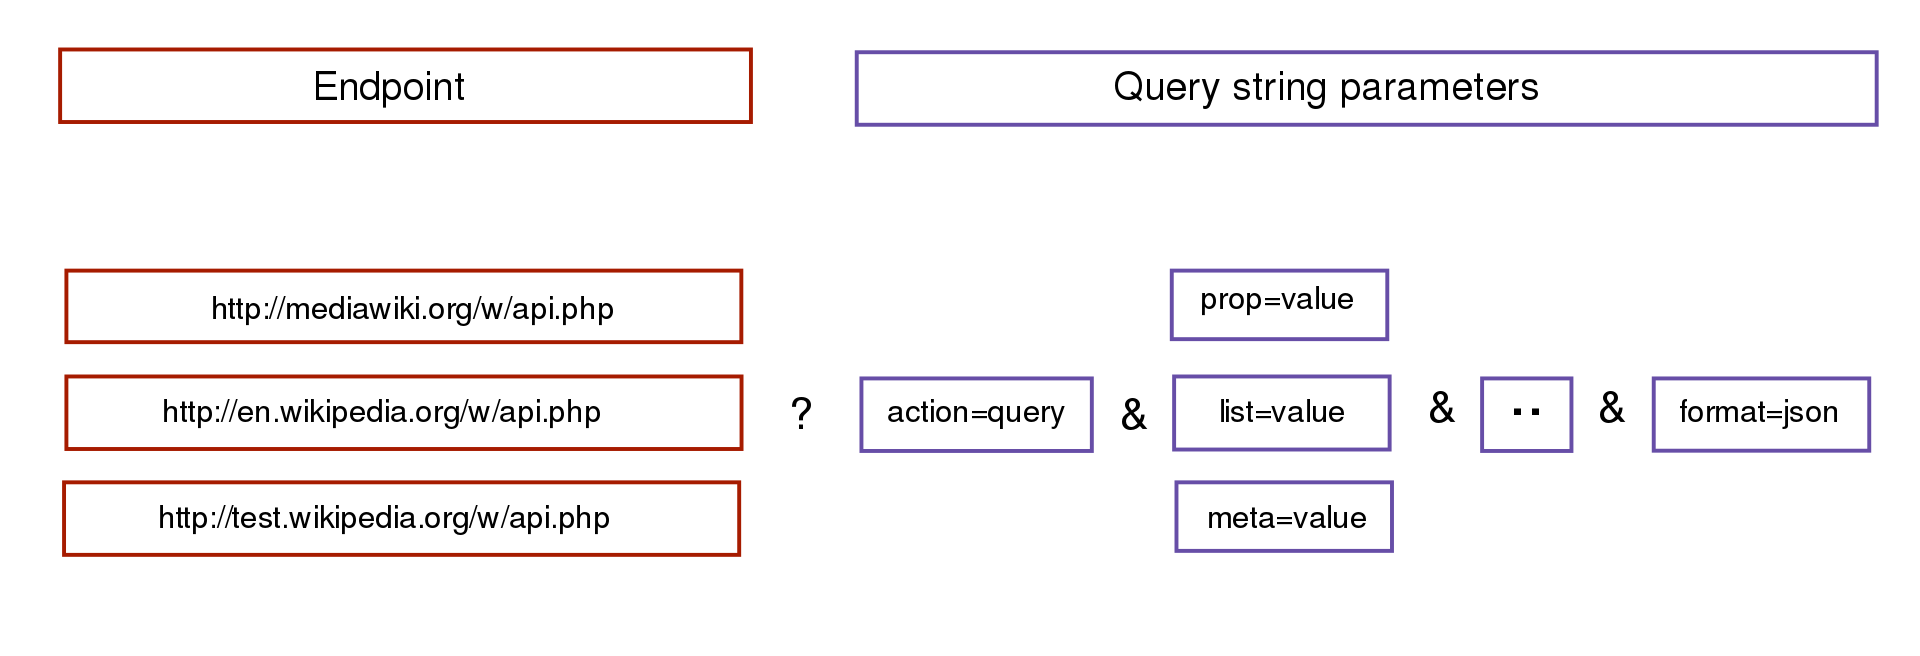

The response from the API is usually returned in a JSON or XML format.


Here’s an example of a JSON-formatted API response:

```json
{
  "status": "OK",
  "result": {
    "id": 123,
    "name": "John Doe",
    "email": "john.doe@example.com"
  }
}
```

Here’s an example of an XML-formatted API response:

```xml
<?xml version="1.0"?>
<response>
  <status>OK</status>
  <result>
    <id>123</id>
    <name>John Doe</name>
    <email>john.doe@example.com</email>
  </result>
</response>
```


## HTTP methods (GET and POST)

There are multiple ways to request information from the webserver, the most used requests are:


*   GET
*   POST
*   PUT
*   DELETE

The GET request is used to retrieve the data from the server without changing it, so it will be the only one we will be using in this workshop.


<br>

Full documentation on HTTP methods is available [here](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods)

## API keys

Tipically API providers require users to register and use API keys. API keys allow the provider to track and control how the API is being used. Here we will take a look at APIs that doesn't require authorization.



# isEven API

Let's take a look at a very simple API that check, whether the number is even: https://isevenapi.xyz/

The API has a single endpoint `https://api.isevenapi.xyz/api/iseven/{number}/`, where `{number}` is the number you want to check.

In [3]:
  import requests

  # Set the number to check
  number=42

  # Define the base URL for the API
  base_url = "https://api.isevenapi.xyz/api/iseven/"

  # Make a GET request to the API
  response = requests.get(base_url + str(number))

  # Check that the request was successful
  if response.status_code == 200:
      # Parse the response as JSON
      data = response.json()

      # Print whether the number is even
      print(f"Is {number} even? {data['iseven']}")
  else:
      print(f"Request failed with status code {response.status_code}")

Is 42 even? True


## Spaceflight News API

Spaceflight News API doesn't require authorizations, so let's take a look at this API.

Very often for different API there is a possibility to try it out and learn to construct API queries in the API sandbox. Let's first take a look at Spaceflight News API sandbox: https://api.spaceflightnewsapi.net/v4/docs/

<br>

First, let's get the latest two articles:
```
https://api.spaceflightnewsapi.net/v4/articles/?limit=2
```

The response is in JSON format and should look similar to this:
```json
{
  "count": 17305,
  "next": "https://api.spaceflightnewsapi.net/v4/articles/?limit=2&offset=2",
  "previous": null,
  "results": [
    {
      "id": 20145,
      "title": "NASA and DARPA Pick Lockheed Martin and BWXT for DRACO",
      "url": "https://spacepolicyonline.com/news/nasa-and-darpa-pick-lockheed-martin-and-bwxt-for-draco/",
      "image_url": "https://spacepolicyonline.com/wp-content/uploads/2023/01/DRACO-DARPA-300x168.jpg",
      "news_site": "SpacePolicyOnline.com",
      "summary": "NASA and DARPA announced today that Lockheed Martin and BWXT will build a nuclear thermal propulsion demonstration vehicle called DRACO. NASA and DARPA joined forces earlier this year to develop […]",
      "published_at": "2023-07-27T03:50:33Z",
      "updated_at": "2023-07-27T03:54:45.655000Z",
      "featured": false,
      "launches": [],
      "events": []
    },
    {
      "id": 20143,
      "title": "Starliner Delay Costs Boeing Another $257 Million",
      "url": "https://spacepolicyonline.com/news/starliner-delay-costs-boeing-another-257-million/",
      "image_url": "https://spacepolicyonline.com/wp-content/uploads/2022/05/OFT2-landing-ingalls-300x200.jpg",
      "news_site": "SpacePolicyOnline.com",
      "summary": "Boeing reported today that continued delays to the CST-100 Starliner commercial crew program have cost the company another $257 million. Boeing is building Starliner under a fixed price contract so […]",
      "published_at": "2023-07-27T02:47:02Z",
      "updated_at": "2023-07-27T02:55:10.293000Z",
      "featured": false,
      "launches": [],
      "events": []
    }
  ]
}
```

Now we can request the specific article using the ID of that article:
```
https://api.spaceflightnewsapi.net/v4/articles/20145
```

And the response is:
```json
{
  "id": 20145,
  "title": "NASA and DARPA Pick Lockheed Martin and BWXT for DRACO",
  "url": "https://spacepolicyonline.com/news/nasa-and-darpa-pick-lockheed-martin-and-bwxt-for-draco/",
  "image_url": "https://spacepolicyonline.com/wp-content/uploads/2023/01/DRACO-DARPA-300x168.jpg",
  "news_site": "SpacePolicyOnline.com",
  "summary": "NASA and DARPA announced today that Lockheed Martin and BWXT will build a nuclear thermal propulsion demonstration vehicle called DRACO. NASA and DARPA joined forces earlier this year to develop […]",
  "published_at": "2023-07-27T03:50:33Z",
  "updated_at": "2023-07-27T03:54:45.655000Z",
  "featured": false,
  "launches": [],
  "events": []
}
```

## Exercise

Find out how many articles are there in the Spaceflight News API database.

## How to query API using Python

For that, we need Python library *requests*:

In [ ]:
import requests

url = 'https://api.spaceflightnewsapi.net/v4/articles/?limit=2'
response = requests.get(url)
response.json()

{'count': 17305,
 'next': 'https://api.spaceflightnewsapi.net/v4/articles/?limit=2&offset=2',
 'previous': None,
 'results': [{'id': 20145,
   'title': 'NASA and DARPA Pick Lockheed Martin and BWXT for DRACO',
   'url': 'https://spacepolicyonline.com/news/nasa-and-darpa-pick-lockheed-martin-and-bwxt-for-draco/',
   'image_url': 'https://spacepolicyonline.com/wp-content/uploads/2023/01/DRACO-DARPA-300x168.jpg',
   'news_site': 'SpacePolicyOnline.com',
   'summary': 'NASA and DARPA announced today that Lockheed Martin and BWXT will build a nuclear thermal propulsion demonstration vehicle called DRACO. NASA and DARPA joined forces earlier this year to develop […]',
   'published_at': '2023-07-27T03:50:33Z',
   'updated_at': '2023-07-27T03:54:45.655000Z',
   'featured': False,
   'launches': [],
   'events': []},
  {'id': 20143,
   'title': 'Starliner Delay Costs Boeing Another $257 Million',
   'url': 'https://spacepolicyonline.com/news/starliner-delay-costs-boeing-another-257-million/',


Usually, parameters are passed as JSON together with the request:

In [ ]:
base_url = 'https://api.spaceflightnewsapi.net/v4/'
endpoint = 'articles'
parameters = {'limit': 5}

url = base_url + endpoint
response = requests.get(url, params=parameters)
response.json()

{'count': 17305,
 'next': 'https://api.spaceflightnewsapi.net/v4/articles/?limit=5&offset=5',
 'previous': None,
 'results': [{'id': 20145,
   'title': 'NASA and DARPA Pick Lockheed Martin and BWXT for DRACO',
   'url': 'https://spacepolicyonline.com/news/nasa-and-darpa-pick-lockheed-martin-and-bwxt-for-draco/',
   'image_url': 'https://spacepolicyonline.com/wp-content/uploads/2023/01/DRACO-DARPA-300x168.jpg',
   'news_site': 'SpacePolicyOnline.com',
   'summary': 'NASA and DARPA announced today that Lockheed Martin and BWXT will build a nuclear thermal propulsion demonstration vehicle called DRACO. NASA and DARPA joined forces earlier this year to develop […]',
   'published_at': '2023-07-27T03:50:33Z',
   'updated_at': '2023-07-27T03:54:45.655000Z',
   'featured': False,
   'launches': [],
   'events': []},
  {'id': 20143,
   'title': 'Starliner Delay Costs Boeing Another $257 Million',
   'url': 'https://spacepolicyonline.com/news/starliner-delay-costs-boeing-another-257-million/',


## Introducing Pandas

We will use Pandas to work with tabular data in Python. Pandas is using a two-dimensional data structures called DataFrames.

In [ ]:
import json
import pandas as pd

# Save DataFrame to CSV
data = response.json()

df = pd.DataFrame(data['results'])
df


,id,title,url,image_url,news_site,summary,published_at,updated_at,featured,launches,events
0,20145,NASA and DARPA Pick Lockheed Martin and BWXT f...,https://spacepolicyonline.com/news/nasa-and-da...,https://spacepolicyonline.com/wp-content/uploa...,SpacePolicyOnline.com,NASA and DARPA announced today that Lockheed M...,2023-07-27T03:50:33Z,2023-07-27T03:54:45.655000Z,False,[],[]
1,20143,Starliner Delay Costs Boeing Another $257 Million,https://spacepolicyonline.com/news/starliner-d...,https://spacepolicyonline.com/wp-content/uploa...,SpacePolicyOnline.com,Boeing reported today that continued delays to...,2023-07-27T02:47:02Z,2023-07-27T02:55:10.293000Z,False,[],[]
2,20142,L3Harris’ acquisition of Aerojet Rocketdyne ne...,https://spacenews.com/l3harris-acquisition-of-...,https://i0.wp.com/spacenews.com/wp-content/upl...,SpaceNews,L3Harris told investors July 26 that federal r...,2023-07-26T23:14:37Z,2023-07-26T23:24:20.665000Z,False,[],[]
3,20141,Geospatial intelligence startup Kleos Space fi...,https://spacenews.com/geospatial-intelligence-...,https://i0.wp.com/spacenews.com/wp-content/upl...,SpaceNews,"Kleos Space, a Luxembourg based startup that o...",2023-07-26T22:45:47Z,2023-07-26T22:54:20.581000Z,False,[],[]
4,20139,NASA and DARPA select Lockheed Martin to devel...,https://spacenews.com/nasa-and-darpa-select-lo...,https://i0.wp.com/spacenews.com/wp-content/upl...,SpaceNews,NASA and DARPA have selected Lockheed Martin t...,2023-07-26T21:49:33Z,2023-07-26T21:54:20.596000Z,False,[],[]


# Metropolitan Museum of Art API

Let's explore the Metropolitan Museum of Art's API. It allows users to access high-level object records for artworks in The Met's collection, which includes over 470,000 pieces.

The documentation is available here: https://metmuseum.github.io/

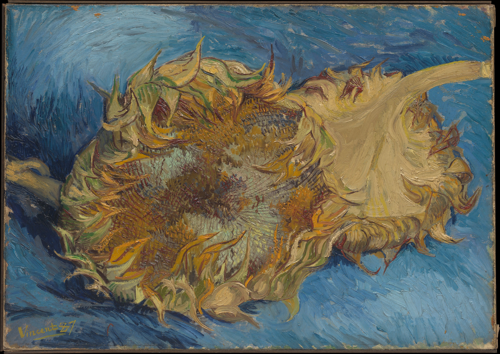

No image found for object ID 484935
No image found for object ID 437112
No image found for object ID 210191
No image found for object ID 431264


In [ ]:
import IPython.display as display
from PIL import Image
from io import BytesIO

# Define the base URL for the API
base_url = "https://collectionapi.metmuseum.org/public/collection/v1/"

# Define your query
query = "Sunflowers"

# Make a request to the search endpoint
response = requests.get(f"{base_url}search?q={query}")

# Check that the request was successful
if response.status_code == 200:
    # Parse the response as JSON
    data = response.json()

    # Get the object IDs
    object_ids = data['objectIDs']

    # Fetch the first 5 objects and display their images
    for object_id in object_ids[:5]:
        # Make a request to the objects endpoint
        response = requests.get(f"{base_url}objects/{object_id}")

        # Check that the request was successful
        if response.status_code == 200:
            # Parse the response as JSON
            data = response.json()

            # Get the primary image URL
            image_url = data['primaryImage']

            # Check if the image URL is not empty
            if image_url:
                # Fetch the image data
                response = requests.get(image_url)
                img = Image.open(BytesIO(response.content))

                # Resize the image
                max_size = (500, 500)
                img.thumbnail(max_size)

                # Display the image in the IPython notebook
                display.display(img)
            else:
                print(f"No image found for object ID {object_id}")
else:
    print("Search request failed.")


**Task: Use the Metropolitan Museum of Art's API to find artworks from the "Medieval Art" department. Find at least one image from this department**